Classificação de Texto Multilabel

José Augusto de Almeida Neto

# Estudo de caso - Coco Bambu

## Importar bibliotecas

In [1]:
import pandas as pd
import numpy as np
from nltk.tokenize import word_tokenize

## Carregar datasets

In [2]:
# Carregar dataset
df_cocobambu = pd.read_csv('dataset-coco_bambu.csv')

In [3]:
df_cocobambu

,restaurante,cidade,estado,comentario
0,Coco Bambu Belém,Belém,Pará,"Ar condicionado pingando na cabeça, vc reclama..."
1,Coco Bambu Belém,Belém,Pará,Fomos bem recepcionados e mt bem atendidos com...
2,Coco Bambu Belém,Belém,Pará,NaN
3,Coco Bambu Belém,Belém,Pará,NaN
4,Coco Bambu Belém,Belém,Pará,Atendimento do Izaque no 10....muito atencioso
...,...,...,...,...
455372,Coco Bambu - Anália Franco,São Paulo,São Paulo,NaN
455373,Coco Bambu - Anália Franco,São Paulo,São Paulo,NaN
455374,Coco Bambu - Anália Franco,São Paulo,São Paulo,NaN
455375,Coco Bambu - Anália Franco,São Paulo,São Paulo,NaN


In [4]:
df_local = df_cocobambu.drop(['comentario'], axis=1)
df_local.groupby('restaurante').first()

,cidade,estado
restaurante,,
COCO BAMBU SÃO JOSÉ DO RIO PRETO,São José do Rio Preto,São Paulo
Coco Bambu,Barueri,São Paulo
Coco Bambu (SP Market),São Paulo,São Paulo
Coco Bambu - Anália Franco,São Paulo,São Paulo
Coco Bambu - Dom Pastel,Fortaleza,Ceará
Coco Bambu - Unidade JK,São Paulo,São Paulo
Coco Bambu - Unidade Market Place,São Paulo,São Paulo
Coco Bambu Anhembi,São Paulo,São Paulo
Coco Bambu BH Anchieta,Belo Horizonte,Minas Gerais


## Dataset Coco Bambu

In [5]:
# Remover sentenças nulas
print(df_cocobambu.isnull().sum())
print('Removendo comentários nulos...')
df_cocobambu = df_cocobambu.dropna().reset_index(drop=True)
print(df_cocobambu.isnull().sum())

restaurante         0
cidade              0
estado              0
comentario     133287
dtype: int64
Removendo comentários nulos...
restaurante    0
cidade         0
estado         0
comentario     0
dtype: int64


In [6]:
# Remover sentenças duplicadas
comentarios_duplicados = df_cocobambu.duplicated(subset='comentario').sum()
print("Total de comentários duplicados:", comentarios_duplicados)
df_cocobambu = df_cocobambu.drop_duplicates(subset='comentario', keep='first').reset_index(drop=True)
comentarios_duplicados = df_cocobambu.duplicated(subset='comentario').sum()
print("Total de comentários duplicados:", comentarios_duplicados)

Total de comentários duplicados: 43085
Total de comentários duplicados: 0


In [7]:
# Verificar número de comentários
total_comentarios = df_cocobambu['comentario'].nunique()
print("Total de comentários:", total_comentarios)

Total de comentários: 279005


In [8]:
df_cocobambu

,restaurante,cidade,estado,comentario
0,Coco Bambu Belém,Belém,Pará,"Ar condicionado pingando na cabeça, vc reclama..."
1,Coco Bambu Belém,Belém,Pará,Fomos bem recepcionados e mt bem atendidos com...
2,Coco Bambu Belém,Belém,Pará,Atendimento do Izaque no 10....muito atencioso
3,Coco Bambu Belém,Belém,Pará,O sucesso de uma empresa está diretamente liga...
4,Coco Bambu Belém,Belém,Pará,"Ótimo local para almoçar, beber chopp bem gela..."
...,...,...,...,...
279000,Coco Bambu - Anália Franco,São Paulo,São Paulo,Porque a comida é espetacular.
279001,Coco Bambu - Anália Franco,São Paulo,São Paulo,Maravilhoso ameiii
279002,Coco Bambu - Anália Franco,São Paulo,São Paulo,"Ótimo restaurante para almoçar, ambiente muito..."
279003,Coco Bambu - Anália Franco,São Paulo,São Paulo,Ótima comida; um pouco caro. Recomendo.


In [9]:
# Realizar Stemming
import nltk
from nltk.stem import PorterStemmer
nltk.download('punkt')
stemmer = PorterStemmer()
def stem_words(sentence):
    words = word_tokenize(sentence)
    stemmed_words = [stemmer.stem(word) for word in words]
    return " ".join(stemmed_words)
df_cocobambu['comentario_stem'] = df_cocobambu['comentario'].apply(stem_words)

[nltk_data] Downloading package punkt to C:\Users\José
[nltk_data]     Neto\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [10]:
# Quantidade de comentários por restaurante
counts = df_cocobambu['restaurante'].value_counts()
counts

restaurante
Coco Bambu                                                              36855
Coco Bambu Anhembi                                                      10069
COCO BAMBU SÃO JOSÉ DO RIO PRETO                                         9923
Coco Bambu: Restaurante e Frutos do Mar em Santo André SP                9864
Coco Bambu Curitiba                                                      9726
Coco Bambu Norte Shopping Rio                                            9540
Coco Bambu - Anália Franco                                               9330
Coco Bambu Osasco                                                        8893
Coco Bambu BH Anchieta                                                   8602
Coco Bambu Manaus                                                        8588
Coco Bambu Teresina                                                      8387
Coco Bambu Botafogo                                                      7922
Coco Bambu (SP Market)                              

## Importar melhor modelo

In [11]:
import joblib

# Carregar o modelo a partir do arquivo pkl
model = joblib.load('melhor_modelo/artigo-melhor_modelo.pkl')

# Carregar o vetorizador a partir do arquivo pkl
vectorizer = joblib.load('melhor_modelo/artigo-vetorizador.pkl')

## Aplicação do modelo

In [12]:
# Definindo as sentenças a serem classificadas
X_test = df_cocobambu['comentario_stem']

In [13]:
# Convertendo as sentenças em vetores de recursos TF-IDF usando o TfidfVectorizer:
X_test_tfidf = vectorizer.transform(X_test)

In [14]:
# Aplicar modelo no dataset do Coco Bambu
predictions = model.predict(X_test_tfidf)
predictions_df = pd.DataFrame(predictions) 

In [15]:
# Dataset com os resultados
predictions_df

,0,1,2,3,4,5,6,7
0,1,0,0,0,0,0,0,1
1,1,0,0,0,0,0,0,1
2,0,0,0,0,0,0,0,1
3,1,0,1,0,0,0,0,1
4,0,1,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...
279000,0,0,1,0,0,0,0,0
279001,0,0,0,0,0,0,0,0
279002,1,0,0,1,0,0,0,0
279003,0,0,1,1,0,0,1,0


## Resultados

### Tabela com os comentários e resultados

In [16]:
# Dataset com os comentários e resultados
df_resultados = df_cocobambu.drop(['comentario', 'cidade', 'estado'], axis=1).join(predictions_df)
df_resultados = df_resultados.rename(columns={0: 'ambiente',
                              1: 'bebida',
                              2: 'comida',
                              3: 'geral',
                              4: 'localização',
                              5: 'outros',
                              6: 'preço',
                              7: 'serviço'})
df_resultados.to_csv('resultados/df_resultados.csv', index=False)
df_resultados

,restaurante,comentario_stem,ambiente,bebida,comida,geral,localização,outros,preço,serviço
0,Coco Bambu Belém,"ar condicionado pingando na cabeça , vc reclam...",1,0,0,0,0,0,0,1
1,Coco Bambu Belém,fomo bem recepcionado e mt bem atendido como s...,1,0,0,0,0,0,0,1
2,Coco Bambu Belém,atendimento do izaqu no 10 .... muito atencioso,0,0,0,0,0,0,0,1
3,Coco Bambu Belém,o sucesso de uma empresa está diretament ligad...,1,0,1,0,0,0,0,1
4,Coco Bambu Belém,"ótimo local para almoçar , beber chopp bem gel...",0,1,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...
279000,Coco Bambu - Anália Franco,porqu a comida é espetacular .,0,0,1,0,0,0,0,0
279001,Coco Bambu - Anália Franco,maravilhoso ameiii,0,0,0,0,0,0,0,0
279002,Coco Bambu - Anália Franco,"ótimo restaurant para almoçar , ambient muito ...",1,0,0,1,0,0,0,0
279003,Coco Bambu - Anália Franco,ótima comida ; um pouco caro . recomendo .,0,0,1,1,0,0,1,0


In [17]:
# Obter dataset somente com os comentários que não foram classificados
temas = ['ambiente', 'bebida', 'comida', 'geral', 'localização', 'outros', 'preço', 'serviço']
somente_zero = df_resultados[df_resultados[temas].eq(0).all(axis=1)]
somente_zero.to_csv('resultados/comentarios_sem_classif.csv', index=False)
somente_zero

,restaurante,comentario_stem,ambiente,bebida,comida,geral,localização,outros,preço,serviço
20,Coco Bambu Belém,muito toppp,0,0,0,0,0,0,0,0
23,Coco Bambu Belém,excelent,0,0,0,0,0,0,0,0
33,Coco Bambu Belém,ótimaaa,0,0,0,0,0,0,0,0
37,Coco Bambu Belém,"gratidão é a palavra chave , pelo carinho e po...",0,0,0,0,0,0,0,0
51,Coco Bambu Belém,"muito boa , ainda que foi pra comemorar uma da...",0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...
278923,Coco Bambu - Anália Franco,foi péssimo,0,0,0,0,0,0,0,0
278924,Coco Bambu - Anália Franco,"muito visual , pouco conteúdo .",0,0,0,0,0,0,0,0
278934,Coco Bambu - Anália Franco,campeão ! ! !,0,0,0,0,0,0,0,0
278972,Coco Bambu - Anália Franco,trabalho la,0,0,0,0,0,0,0,0


In [18]:
# Remover linhas que não obtiveram marcação alguma
temas = ['ambiente', 'bebida', 'comida', 'geral', 'localização', 'outros', 'preço', 'serviço']
linhas_remover = df_resultados[temas].eq(0).all(axis=1)
df_resultados = df_resultados[~linhas_remover].reset_index(drop=True)
df_resultados

,restaurante,comentario_stem,ambiente,bebida,comida,geral,localização,outros,preço,serviço
0,Coco Bambu Belém,"ar condicionado pingando na cabeça , vc reclam...",1,0,0,0,0,0,0,1
1,Coco Bambu Belém,fomo bem recepcionado e mt bem atendido como s...,1,0,0,0,0,0,0,1
2,Coco Bambu Belém,atendimento do izaqu no 10 .... muito atencioso,0,0,0,0,0,0,0,1
3,Coco Bambu Belém,o sucesso de uma empresa está diretament ligad...,1,0,1,0,0,0,0,1
4,Coco Bambu Belém,"ótimo local para almoçar , beber chopp bem gel...",0,1,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...
260729,Coco Bambu - Anália Franco,"sempr volto a est lugar , qualidad do prato do...",0,1,1,1,0,0,0,1
260730,Coco Bambu - Anália Franco,porqu a comida é espetacular .,0,0,1,0,0,0,0,0
260731,Coco Bambu - Anália Franco,"ótimo restaurant para almoçar , ambient muito ...",1,0,0,1,0,0,0,0
260732,Coco Bambu - Anália Franco,ótima comida ; um pouco caro . recomendo .,0,0,1,1,0,0,1,0


### Tabela de resultados por restaurante

In [19]:
# Agrupar por nome do restaurante
df_restaurantes = df_resultados.groupby('restaurante')[['ambiente', 'bebida', 'comida', 'geral', 'localização', 'outros', 'preço', 'serviço']].sum()

# Criar coluna com o tema mais repetido
max_col = df_restaurantes.iloc[:, 1:].idxmax(axis=1)
df_restaurantes['tema mais repetido'] = max_col

# Criar coluna com número total de temas por restaurante
df_restaurantes['total de temas assinalados'] = df_restaurantes[['ambiente', 'bebida', 'comida', 'geral', 'localização', 'outros', 'preço', 'serviço']].sum(axis=1)

# Ordenar restaurantes por quantidades de temas assinalados
df_restaurantes = df_restaurantes.sort_values(by='total de temas assinalados', ascending=False)
df_restaurantes.reset_index(inplace=True)

df_restaurantes.to_csv('resultados/df_result_rest.csv', index=False)
df_restaurantes

,restaurante,ambiente,bebida,comida,geral,localização,outros,preço,serviço,tema mais repetido,total de temas assinalados
0,Coco Bambu,6437,1394,15726,8620,205,87,2137,27980,serviço,62586
1,Coco Bambu: Restaurante e Frutos do Mar em San...,2040,313,4394,2533,129,22,601,8028,serviço,18060
2,Coco Bambu Norte Shopping Rio,2440,278,3541,2413,18,21,441,7952,serviço,17104
3,Coco Bambu - Anália Franco,1419,218,3633,2161,68,16,327,8026,serviço,15868
4,Coco Bambu Curitiba,1148,194,3309,1971,26,11,208,8772,serviço,15639
5,Coco Bambu Anhembi,1262,154,2815,1937,69,29,216,8817,serviço,15299
6,Coco Bambu Botafogo,1357,269,3667,1987,29,17,394,6579,serviço,14299
7,Coco Bambu BH Anchieta,1423,325,3300,1817,52,15,489,6676,serviço,14097
8,Coco Bambu (SP Market),1476,280,3301,1849,25,17,543,5805,serviço,13296
9,COCO BAMBU SÃO JOSÉ DO RIO PRETO,853,157,2545,1607,1,11,100,7832,serviço,13106


### Tabela de resultados por restaurante em %

In [20]:
# Substituir valores por valores em porcentagem
total = df_restaurantes['total de temas assinalados']
df_restaurantes_porcent = df_restaurantes

df_restaurantes_porcent[['ambiente', 
         'bebida', 
         'comida', 
         'geral', 
         'localização', 
         'outros', 
         'preço', 
         'serviço']] = df_restaurantes_porcent[['ambiente', 
                                'bebida', 
                                'comida', 
                                'geral', 
                                'localização', 
                                'outros', 
                                'preço', 
                                'serviço']].apply(lambda x: x/total).applymap(lambda x: "{:.2%}".format(x) if isinstance(x, (int, float)) and x > 0 else x)

df_restaurantes_porcent.drop(['tema mais repetido'], axis=1).drop(['total de temas assinalados'], axis=1).to_csv('resultados/df_result_rest_porcent.csv', index=False)
df_restaurantes_porcent

,restaurante,ambiente,bebida,comida,geral,localização,outros,preço,serviço,tema mais repetido,total de temas assinalados
0,Coco Bambu,10.29%,2.23%,25.13%,13.77%,0.33%,0.14%,3.41%,44.71%,serviço,62586
1,Coco Bambu: Restaurante e Frutos do Mar em San...,11.30%,1.73%,24.33%,14.03%,0.71%,0.12%,3.33%,44.45%,serviço,18060
2,Coco Bambu Norte Shopping Rio,14.27%,1.63%,20.70%,14.11%,0.11%,0.12%,2.58%,46.49%,serviço,17104
3,Coco Bambu - Anália Franco,8.94%,1.37%,22.90%,13.62%,0.43%,0.10%,2.06%,50.58%,serviço,15868
4,Coco Bambu Curitiba,7.34%,1.24%,21.16%,12.60%,0.17%,0.07%,1.33%,56.09%,serviço,15639
5,Coco Bambu Anhembi,8.25%,1.01%,18.40%,12.66%,0.45%,0.19%,1.41%,57.63%,serviço,15299
6,Coco Bambu Botafogo,9.49%,1.88%,25.65%,13.90%,0.20%,0.12%,2.76%,46.01%,serviço,14299
7,Coco Bambu BH Anchieta,10.09%,2.31%,23.41%,12.89%,0.37%,0.11%,3.47%,47.36%,serviço,14097
8,Coco Bambu (SP Market),11.10%,2.11%,24.83%,13.91%,0.19%,0.13%,4.08%,43.66%,serviço,13296
9,COCO BAMBU SÃO JOSÉ DO RIO PRETO,6.51%,1.20%,19.42%,12.26%,0.01%,0.08%,0.76%,59.76%,serviço,13106


### Gráficos

In [34]:
# Converter as porcentagens para tipo numérico
df_grafico = df_restaurantes_porcent.drop(['tema mais repetido', 'total de temas assinalados'], axis=1)
df_grafico[temas] = df_grafico[temas].apply(lambda x: x.str.rstrip('%').astype(float))
# Substituir NaN por 0
df_grafico = df_grafico.fillna(0)

C:\Users\José Neto\AppData\Local\Temp\ipykernel_11096\2705783270.py:30: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_yticklabels([str(label) + '%' for label in plt.gca().get_yticks()])


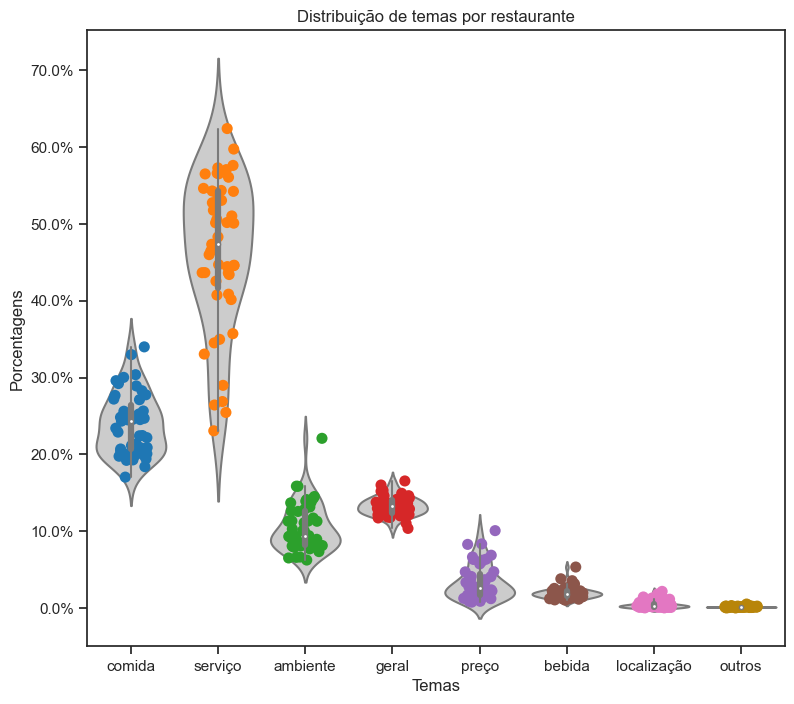

In [42]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Temas e porcentagens
temas = ['comida', 'serviço', 'ambiente', 'geral', 'preço', 'bebida', 'localização', 'outros']
porcentagens = df_grafico[temas]

# Configurar o estilo do Seaborn
sns.set(style='ticks')

# Criar uma nova figura com um tamanho maior
plt.figure(figsize=(9,8))  # Ajuste as dimensões conforme necessário

# Definir a nova paleta de cores
paleta = sns.color_palette(['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#b8850a'])

# Plotar o gráfico de dispersão com a nova paleta de cores
sns.stripplot(data=porcentagens, jitter=0.2, size=8, zorder=2, palette=paleta)

# Plotar o gráfico violino
sns.violinplot(data=porcentagens, color='0.8', scale='count', zorder=1)

# Configurar os rótulos dos eixos
plt.title('Distribuição de temas por restaurante')
plt.xlabel('Temas')
plt.ylabel('Porcentagens')
plt.xticks(range(len(temas)), temas)
# Adicionar o símbolo de porcentagem aos valores do eixo y
plt.gca().set_yticklabels([str(label) + '%' for label in plt.gca().get_yticks()])

'''# Adicionar uma grade
plt.grid(True)'''

# Mostrar o gráfico
plt.show()


C:\Users\José Neto\AppData\Local\Temp\ipykernel_11096\2189169166.py:25: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_yticklabels([str(label) + '%' for label in plt.gca().get_yticks()])


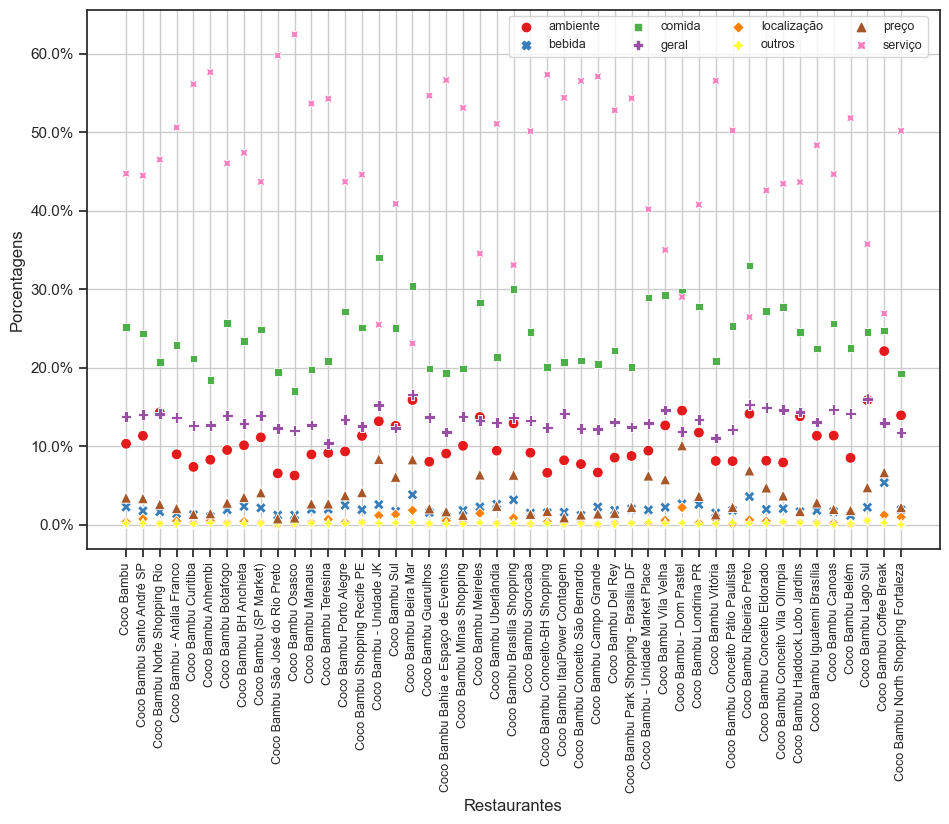

In [43]:
import seaborn.objects as so
import seaborn as sns
import matplotlib.pyplot as plt

df_grafico = pd.read_csv('resultados/grafico-teste.csv')

# Temas e porcentagens
temas = ['ambiente', 'bebida', 'comida', 'geral', 'localização', 'outros', 'preço', 'serviço']
porcentagens = df_grafico[temas]

# Configurar o estilo do Seaborn
sns.set(style='ticks')

# Criar uma nova figura com um tamanho maior
plt.figure(figsize=(11, 7))  # Ajuste as dimensões conforme necessário

# Plotar o gráfico de dispersão
sns.scatterplot(data=porcentagens, palette='Set1', s=60)

# Configurar os rótulos dos eixos
plt.xlabel('Restaurantes') 
plt.ylabel('Porcentagens')
plt.xticks(range(len(df_grafico)), df_grafico['restaurante'], rotation=90, fontsize=9)
# Adicionar o símbolo de porcentagem aos valores do eixo y
plt.gca().set_yticklabels([str(label) + '%' for label in plt.gca().get_yticks()])

# Adicionar uma grade
plt.grid(True)

# Mover a legenda para a parte superior
plt.legend(loc='upper center', bbox_to_anchor=(0.74, 1), ncol=4, fontsize=9)

# Mostrar o gráfico
plt.show()
